In [ ]:
#https://github.com/bansalrishi/MachineLearningWithPython_UD

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("pima-data.csv")

In [3]:
df.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [4]:
#checking null values
df.isnull().values.any()

False

In [5]:
#correlated feature check:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


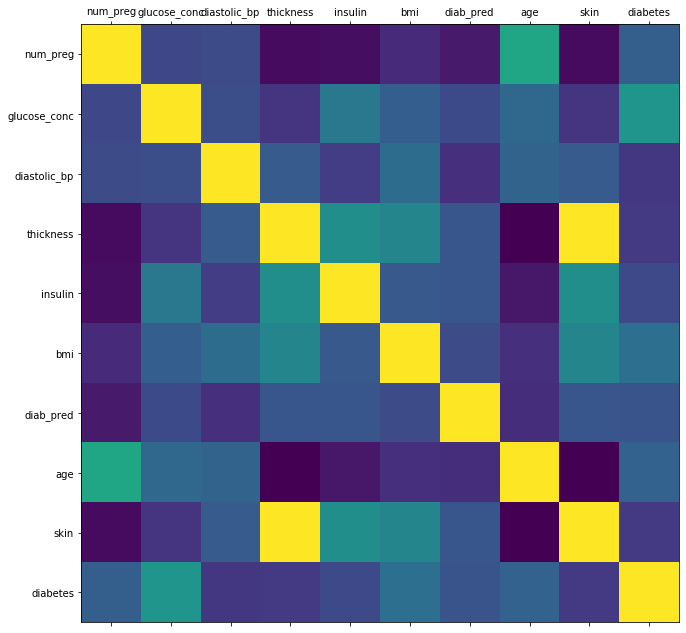

In [7]:
def plot_df(df,size=11):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    
plot_df(df)
#heatmapi bu şekilde yapmış

In [9]:
#data molding (encoding)
#dataları numeric yapmak
diab_map={True:1,False:0}
df['diabetes']=df['diabetes'].map(diab_map)
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [10]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [20]:
#data splitting
from sklearn.model_selection import train_test_split
feature_col_names=['num_preg', 'glucose_conc', 'diastolic_bp', 
        'thickness', 'insulin','bmi', 'diab_pred', 'age', 
        'skin']
predicted_col_names=['diabetes']

X=df[feature_col_names].values
y=df[predicted_col_names].values

split_size=0.30
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=split_size,random_state=42)

print("Training set {0:0.2f}%".format((float(len(X_train))/float(len(df.index)))*100))
print("Test set {0:0.2f}%".format((float(len(X_test))/float(len(df.index)))*100))


Training set 69.92%
Test set 30.08%


In [21]:
#Impute missing values
#drop or replace
from sklearn.impute import SimpleImputer
fill_0=SimpleImputer(missing_values=0,strategy="mean")

X_train=fill_0.fit_transform(X_train)
X_test= fill_0.fit_transform(X_test)
print(X_train)

[[  1.          95.          60.         ...   0.26        22.
    0.7092    ]
 [  5.         105.          72.         ...   0.159       28.
    1.1426    ]
 [  4.34056399 135.          68.         ...   0.365       24.
    1.6548    ]
 ...
 [ 10.         101.          86.         ...   1.136       38.
    1.4578    ]
 [  4.34056399 141.          72.24131274 ...   0.205       29.
    1.12871227]
 [  4.34056399 125.          96.         ...   0.262       21.
    1.12871227]]


In [22]:
#Scaling
#z = (x-mu/sigma)  standartlaştırma
from sklearn import preprocessing
exam_data=pd.read_csv('exams.csv',quotechar='"')
exam_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,standard,completed,79,75,81
1,female,group C,associate's degree,free/reduced,none,56,65,64
2,male,group D,bachelor's degree,standard,none,86,68,74
3,female,group A,bachelor's degree,standard,none,68,78,76
4,female,group D,high school,free/reduced,none,49,68,61


In [23]:
exam_data[['math score']]=exam_data[['math score']].astype(float)
exam_data[['reading score']]=exam_data[['reading score']].astype(float)
exam_data[['writing score']]=exam_data[['writing score']].astype(float)
exam_data[['math score']]=preprocessing.scale(exam_data[['math score']])
exam_data[['reading score']]=preprocessing.scale(exam_data[['reading score']])
exam_data[['writing score']]=preprocessing.scale(exam_data[['writing score']])

In [24]:
exam_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,standard,completed,0.994557,0.574138,1.049901
1,female,group C,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
2,male,group D,bachelor's degree,standard,none,1.493976,0.053547,0.544099
3,female,group A,bachelor's degree,standard,none,0.209756,0.797248,0.688613
4,female,group D,high school,free/reduced,none,-1.145810,0.053547,-0.395248


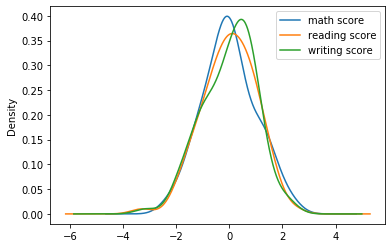

In [25]:
df_plot=exam_data[['math score','reading score','writing score']].copy()
df_plot.plot.kde()

In [26]:
#Label Encoder
le =preprocessing.LabelEncoder()
exam_data['gender']=le.fit_transform(exam_data['gender'].astype(str))
exam_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group E,associate's degree,standard,completed,0.994557,0.574138,1.049901
1,0,group C,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
2,1,group D,bachelor's degree,standard,none,1.493976,0.053547,0.544099
3,0,group A,bachelor's degree,standard,none,0.209756,0.797248,0.688613
4,0,group D,high school,free/reduced,none,-1.145810,0.053547,-0.395248


In [27]:
print(le.classes_)

['female' 'male']


In [28]:
#One hot encoding
exam_data = pd.get_dummies(exam_data,columns=['race/ethnicity','parental level of education','lunch','test preparation course',])
exam_data.head(5)

,gender,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0.994557,0.574138,1.049901,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0
1,0,-0.646391,-0.169564,-0.178476,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
2,1,1.493976,0.053547,0.544099,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
3,0,0.209756,0.797248,0.688613,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,0,-1.145810,0.053547,-0.395248,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1


In [ ]:
#kursun sonu 1 saat